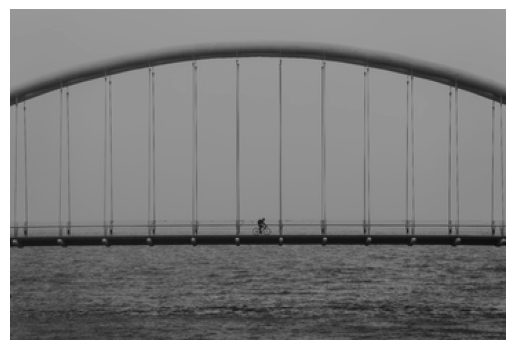

In [1]:
import os
from matplotlib import pyplot as plt
from matplotlib.image import imread
from pathlib import Path

path = os.path.join('DATA/PICS', 'most.pgm')
M = imread(path).astype('float32')
plt.axis('off')
plt.imshow(M, cmap='gray', vmin=0, vmax=400)
plt.margins(x=0)
plt.savefig(Path('DATA/PICS/most.jpg'),bbox_inches='tight', pad_inches=0)

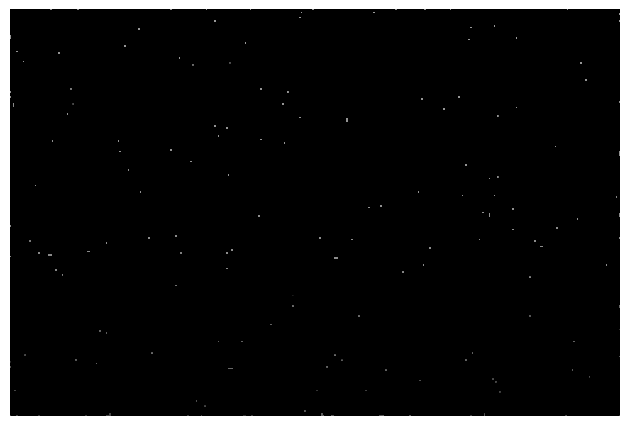

In [2]:
from utils.data_generation import remove_pixels_uniformly
import numpy as np
from pathlib import Path
import matplotlib


M_incomplete = remove_pixels_uniformly(M, missing_part=0.8)
plt.axis('off')
plt.tight_layout()
current_cmap = matplotlib.cm.get_cmap('gray')
current_cmap.set_bad(color='black')




plt.imshow(M_incomplete, vmin=0, vmax=400, cmap=current_cmap )
plt.margins(x=0)
plt.savefig(Path('DATA/PICS/most_missing.jpg') ,bbox_inches='tight', pad_inches=0)
#missing_mask = np.isnan(M_incomplete)

In [5]:
%%time

from src.css_matrix_completion.cssmc import CSSMC, CSSMC_N
from src.css_matrix_completion.transform import cx
from src.css_matrix_completion.css import uniform

n_selected_cols = int(0.5* M.shape[1])
solver = CSSMC_N(col_number=n_selected_cols, transform=cx, col_select=uniform, fill_method='zero')
M_filled, cols_idx = solver.fit_transform(M_incomplete)

KeyboardInterrupt: 

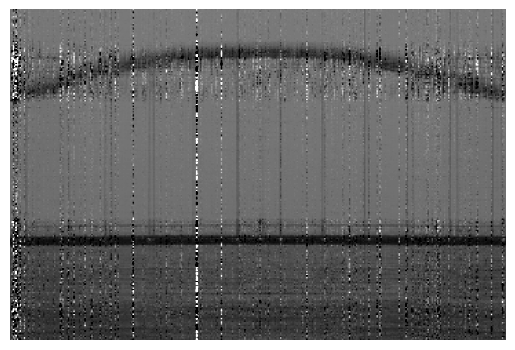

In [40]:
plt.axis('off')
plt.imshow(M_filled, cmap='gray')
plt.imshow(M_filled, cmap='gray', vmin=0, vmax=500)

plt.margins(x=0)
plt.savefig(Path('DATA/PICS/most_filled.jpg') ,bbox_inches='tight', pad_inches=0)

In [23]:
import numpy as np
np.linalg.norm(M - M_filled) / np.linalg.norm(M)
print(f"rmse_omega {np.linalg.norm(M_filled[missing_mask]- M[missing_mask])/np.linalg.norm(M[missing_mask])}")
print(f"mae_omega {np.mean(np.abs(M_filled[missing_mask]- M[missing_mask]))}")

NameError: name 'missing_mask' is not defined

In [33]:
M.shape

(240, 360)

In [5]:
20 * np.log10(np.linalg.norm(M)/np.linalg.norm(M_filled - M))

26.482028706362037

In [3]:
from src.css_matrix_completion.mc import grid_svt

M_filled = grid_svt(M_incomplete)

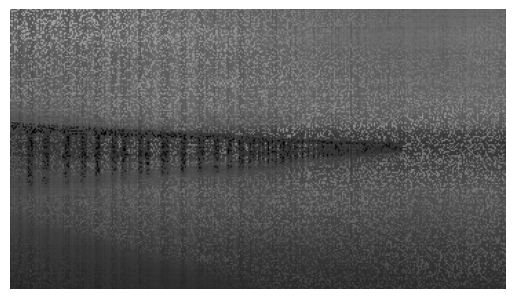

In [4]:
plt.axis('off')
plt.imshow(M_filled, cmap='gray')
plt.imshow(M_filled, cmap='gray', vmin=0, vmax=400)

In [5]:
import numpy as np
np.linalg.norm(M - M_filled) / np.linalg.norm(M)

0.2635786939332369

In [46]:
%%time
from css_matrix_completion.mc import svt
import numpy as np
M_filled = svt(M_incomplete, np.isnan(M_incomplete))

/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(
/home/tosia/.pyenv/versions/3.9.5/lib/python3.8/site-packages/sklearn/utils/extmath.py:370: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


CPU times: user 10.9 s, sys: 24.6 s, total: 35.6 s
Wall time: 5.62 s


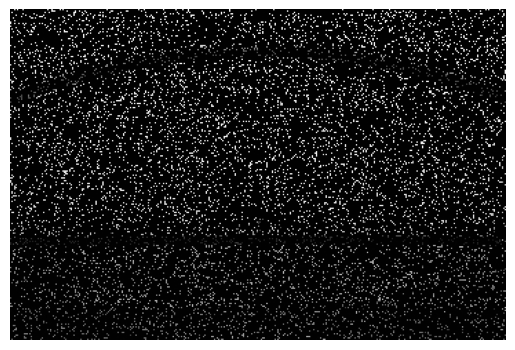

In [47]:
plt.axis('off')
plt.imshow(M_filled, cmap='gray')

In [42]:
np.linalg.norm(M - M_filled) / np.linalg.norm(M)

0.8354416

In [41]:
print(f"rmse_omega {np.linalg.norm(M_filled[missing_mask]- M[missing_mask])/np.linalg.norm(M[missing_mask])}")
print(f"mae_omega {np.mean(np.abs(M_filled[missing_mask]- M[missing_mask]))}")
print(f"filled rank {np.linalg.matrix_rank(M_filled)}")

rmse_omega 0.9993167519569397
mae_omega 186.06008911132812
filled rank 853


In [28]:
print(f"filled rank {np.linalg.matrix_rank(M_filled)}")

filled rank 320
